# Lab 4: Convolutional Neural Nets (CNNs)

## Assignment: LeNet5 Implementation

This LeNet5 implementation used Tanh as activation function and Adam as optimizer. The parameters used were the following:
* learning rate = 0.001
* Batch size = 150
* Epoch number = 3
* regularization with weight decaying factor = 1e-6
* 2 convolutional layers, 2 maxpool layers, and 1 fully connected layer, output layer - softmax


In [ ]:
import torch
import torchvision
from torch import nn
import torch.nn.functional as F
from torchvision import transforms


train_batch_size = 150  # Define train batch size
test_batch_size = 150  # Define test batch size (can be larger than train batch size)


# Use the following code to load and normalize the dataset
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        "/files/",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.5,), (0.5,)),
            ]
        ),
    ),
    batch_size=train_batch_size,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        "/files/",
        train=False,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.ToTensor(),
                torchvision.transforms.Normalize((0.5,), (0.5,)),
            ]
        ),
    ),
    batch_size=test_batch_size,
    shuffle=True,
)

In [ ]:
class LeNet5(nn.Module):
    def __init__(self, n_classes):
        super(LeNet5, self).__init__()
        # Convolution 1
        self.cov1 = nn.Conv2d(
            in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0
        )
        self.act1 = nn.Tanh()

        # Maxpool 1
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolution 2

        self.cov2 = nn.Conv2d(
            in_channels=16, out_channels=24, kernel_size=4, stride=1, padding=0
        )
        self.act2 = nn.Tanh()

        # Maxpool 2
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected 1
        self.fc1 = nn.Linear(5 * 5 * 24, 10)

        # define LeNet5

    def forward(self, x):
        # Define forward pass
        # n x 1 x 28 x 28
        out = self.cov1(x)  # n x 16 x 26 x 26
        out = self.act1(out)

        out = self.maxpool1(out)  # n x 16 x 13 x 13

        out = self.cov2(out)  # n x 24 x 10 x 10
        out = self.act2(out)

        out = self.maxpool2(out)  # n x 24 x 5 x 5

        out = out.view(out.size(0), -1)
        out = self.fc1(out)  # n x 1 x 600

        m = nn.Softmax(dim=1)  # n x 10
        logits = m(out)
        return logits  # can also return probabilities
        # by performing softmax

In [ ]:
import numpy as np
import tqdm

# initialize the number of classes for output
model = LeNet5(10)

# define Adam optimizer with learning rate 0.001, and L2 regularization factor 1e-6
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-6)

epochs = 3

loss_fn = nn.CrossEntropyLoss()

# every 50 iterations for log
log_interval = 50

loss_list = []
iteration_list = []
accuracy_list = []
count = 0

for epoch in tqdm.trange(epochs):
    for idx, (data, labels) in enumerate(train_loader):

        # Calculate training loss on model
        pred_y = model(data)
        loss = loss_fn(pred_y, labels)

        # zeros gradients
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # save loss and accuracy for every 50 iterations
        if idx % log_interval == 0:
            print(
                "Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch + 1,
                    idx * len(data),
                    len(train_loader.dataset),
                    100.0 * idx / len(train_loader),
                    loss.item(),
                )
            )
            loss_list.append(loss.item())
            count += log_interval
            iteration_list.append(count)

            # calculate validation accuracy
            with torch.no_grad():
                n_sample = len(test_loader.dataset)
                n_correct = 0
                for idxx, (data, labels) in enumerate(test_loader):
                    pred_y = model(data)
                    n_correct += sum(
                        (torch.argmax(pred_y, dim=1) == labels).type(torch.FloatTensor)
                    )
                accuracy_list.append(100.0 * n_correct / n_sample)
                print(
                    "Validation set: number of correct labels: {}/{} accuracy: ({:.0f}%)\n".format(
                        int(n_correct), n_sample, 100.0 * n_correct / n_sample
                    )
                )

  0%|          | 0/3 [00:00<?, ?it/s]

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.303127
Validation set: number of correct labels: 1376/10000 accuracy: (14%)

Train Epoch: 1 [7500/60000 (12%)]	Loss: 1.699574
Validation set: number of correct labels: 8516/10000 accuracy: (85%)

Train Epoch: 1 [15000/60000 (25%)]	Loss: 1.605340
Validation set: number of correct labels: 9102/10000 accuracy: (91%)

Train Epoch: 1 [22500/60000 (38%)]	Loss: 1.573040
Validation set: number of correct labels: 9307/10000 accuracy: (93%)

Train Epoch: 1 [30000/60000 (50%)]	Loss: 1.533985
Validation set: number of correct labels: 9430/10000 accuracy: (94%)

Train Epoch: 1 [37500/60000 (62%)]	Loss: 1.548530
Validation set: number of correct labels: 9493/10000 accuracy: (95%)

Train Epoch: 1 [45000/60000 (75%)]	Loss: 1.535510
Validation set: number of correct labels: 9569/10000 accuracy: (96%)

Train Epoch: 1 [52500/60000 (88%)]	Loss: 1.504873
Validation set: number of correct labels: 9596/10000 accuracy: (96%)



 33%|███▎      | 1/3 [00:56<01:52, 56.00s/it]

Train Epoch: 2 [0/60000 (0%)]	Loss: 1.535938
Validation set: number of correct labels: 9644/10000 accuracy: (96%)

Train Epoch: 2 [7500/60000 (12%)]	Loss: 1.522160
Validation set: number of correct labels: 9658/10000 accuracy: (97%)

Train Epoch: 2 [15000/60000 (25%)]	Loss: 1.503143
Validation set: number of correct labels: 9680/10000 accuracy: (97%)

Train Epoch: 2 [22500/60000 (38%)]	Loss: 1.526679
Validation set: number of correct labels: 9683/10000 accuracy: (97%)

Train Epoch: 2 [30000/60000 (50%)]	Loss: 1.501483
Validation set: number of correct labels: 9705/10000 accuracy: (97%)

Train Epoch: 2 [37500/60000 (62%)]	Loss: 1.482056
Validation set: number of correct labels: 9711/10000 accuracy: (97%)

Train Epoch: 2 [45000/60000 (75%)]	Loss: 1.500199
Validation set: number of correct labels: 9728/10000 accuracy: (97%)

Train Epoch: 2 [52500/60000 (88%)]	Loss: 1.507357
Validation set: number of correct labels: 9742/10000 accuracy: (97%)



 67%|██████▋   | 2/3 [01:48<00:54, 54.15s/it]

Train Epoch: 3 [0/60000 (0%)]	Loss: 1.490833
Validation set: number of correct labels: 9757/10000 accuracy: (98%)

Train Epoch: 3 [7500/60000 (12%)]	Loss: 1.505858
Validation set: number of correct labels: 9769/10000 accuracy: (98%)

Train Epoch: 3 [15000/60000 (25%)]	Loss: 1.509428
Validation set: number of correct labels: 9769/10000 accuracy: (98%)

Train Epoch: 3 [22500/60000 (38%)]	Loss: 1.482791
Validation set: number of correct labels: 9787/10000 accuracy: (98%)

Train Epoch: 3 [30000/60000 (50%)]	Loss: 1.508610
Validation set: number of correct labels: 9794/10000 accuracy: (98%)

Train Epoch: 3 [37500/60000 (62%)]	Loss: 1.491724
Validation set: number of correct labels: 9795/10000 accuracy: (98%)

Train Epoch: 3 [45000/60000 (75%)]	Loss: 1.488782
Validation set: number of correct labels: 9791/10000 accuracy: (98%)

Train Epoch: 3 [52500/60000 (88%)]	Loss: 1.475020
Validation set: number of correct labels: 9785/10000 accuracy: (98%)



100%|██████████| 3/3 [02:44<00:00, 54.90s/it]


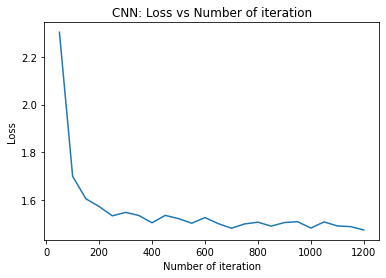

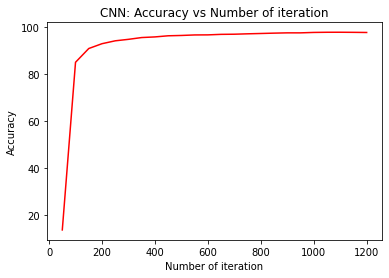

In [ ]:
import matplotlib.pyplot as plt

# visualization loss
plt.plot(iteration_list, loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("CNN: Loss vs Number of iteration")
plt.show()

# visualization accuracy
plt.plot(iteration_list, accuracy_list, color="red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("CNN: Accuracy vs Number of iteration")
plt.show()

In [ ]:
# get the first 10 test images and predict their labels
with torch.no_grad():
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,)),
        ]
    )
    test_10 = test_loader.dataset.data[:10].numpy()
    np_test_10 = np.moveaxis(test_10, 0, -1)
    images = transform(np_test_10)[:10, None, :, :]

    pred_y = model(images)

Probabilties:
 '0'-0.000 ; '1'-0.000 ; '2'-0.000 ; '3'-0.000 ; '4'-0.000 ; '5'-0.000 ; '6'-0.000 ; '7'-1.000 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-0.000 ; '1'-0.000 ; '2'-1.000 ; '3'-0.000 ; '4'-0.000 ; '5'-0.000 ; '6'-0.000 ; '7'-0.000 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-0.000 ; '1'-0.999 ; '2'-0.000 ; '3'-0.000 ; '4'-0.000 ; '5'-0.000 ; '6'-0.000 ; '7'-0.000 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-1.000 ; '1'-0.000 ; '2'-0.000 ; '3'-0.000 ; '4'-0.000 ; '5'-0.000 ; '6'-0.000 ; '7'-0.000 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-0.000 ; '1'-0.000 ; '2'-0.000 ; '3'-0.000 ; '4'-1.000 ; '5'-0.000 ; '6'-0.000 ; '7'-0.000 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-0.000 ; '1'-0.999 ; '2'-0.000 ; '3'-0.000 ; '4'-0.000 ; '5'-0.000 ; '6'-0.000 ; '7'-0.001 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-0.000 ; '1'-0.000 ; '2'-0.000 ; '3'-0.000 ; '4'-1.000 ; '5'-0.000 ; '6'-0.000 ; '7'-0.000 ; '8'-0.000 ; '9'-0.000 ;
Probabilties:
 '0'-0.000 ; '1'-0.000 ; '2'-0.000 ; '3'-

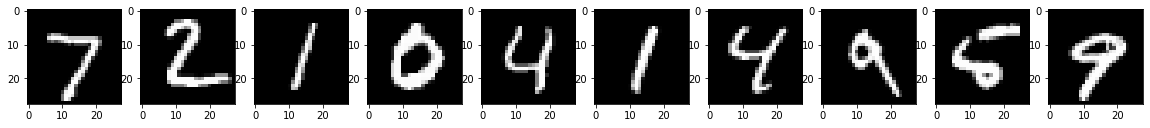

In [ ]:
# plot the 10 test images, show their probabilities
fig, ax = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    ax[i].imshow(test_10[i], cmap="gray")
    print(
        "Probabilties:\n '0'-{:.3f} ; '1'-{:.3f} ; '2'-{:.3f} ; '3'-{:.3f} ; '4'-{:.3f} ; '5'-{:.3f} ; '6'-{:.3f} ; '7'-{:.3f} ; '8'-{:.3f} ; '9'-{:.3f} ;".format(
            *[j.item() for j in pred_y[i]]
        )
    )

In [ ]:
#from google.colab import drive
#
#drive.mount("/content/drive")
#!pip install black[jupyter]
#!black /content/drive/MyDrive/Colab\ Notebooks/amath\ 563/labs/4/lab4.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
